In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Нормалізація зображень до діапазону [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Зміна розмірності для відповідності вимогам VGG16
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Збільшення розміру зображень до 48x48 (мінімальний розмір для VGG16)
train_images = tf.image.resize(train_images, (48, 48))
test_images = tf.image.resize(test_images, (48, 48))

# Конвертування до 3-х канального формату для VGG16
train_images = tf.image.grayscale_to_rgb(train_images)
test_images = tf.image.grayscale_to_rgb(test_images)

In [4]:
# Створення згорткової основи на базі VGG16
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = False  # Заморожуємо базу


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Додавання повнозв'язного класифікатора
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.6835 - loss: 1.0946 - val_accuracy: 0.8170 - val_loss: 0.5170
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - accuracy: 0.8333 - loss: 0.4768 - val_accuracy: 0.8368 - val_loss: 0.4536
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8486 - loss: 0.4219 - val_accuracy: 0.8472 - val_loss: 0.4294
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8588 - loss: 0.3953 - val_accuracy: 0.8522 - val_loss: 0.4123
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8609 - loss: 0.3871 - val_accuracy: 0.8564 - val_loss: 0.4080
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8669 - loss: 0.3710 - val_accuracy: 0.8588 - val_loss: 0.3955
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.8711 - loss: 0.3589 - val_accuracy: 0.8651 - val_loss: 0.3848
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8732 -

In [8]:
# "Розморожування" верхніх шарів для донавчання
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    layer.trainable = set_trainable


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі з донавчанням
history_fine_tune = model.fit(train_images, train_labels, epochs=10,
                               validation_data=(test_images, test_labels))

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних після донавчання: {test_acc:.4f}')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8841 - loss: 0.3203 - val_accuracy: 0.8887 - val_loss: 0.3128
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9149 - loss: 0.2293 - val_accuracy: 0.9001 - val_loss: 0.2769
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9305 - loss: 0.1880 - val_accuracy: 0.9045 - val_loss: 0.2642
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9420 - loss: 0.1603 - val_accuracy: 0.9127 - val_loss: 0.2541
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9528 - loss: 0.1300 - val_accuracy: 0.9103 - val_loss: 0.2579
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9618 - loss: 0.1121 - val_accuracy: 0.9126 - val_loss: 0.2608
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9667 - loss: 0.0965 - val_accuracy: 0.9134 - val_loss: 0.2520
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9729 -

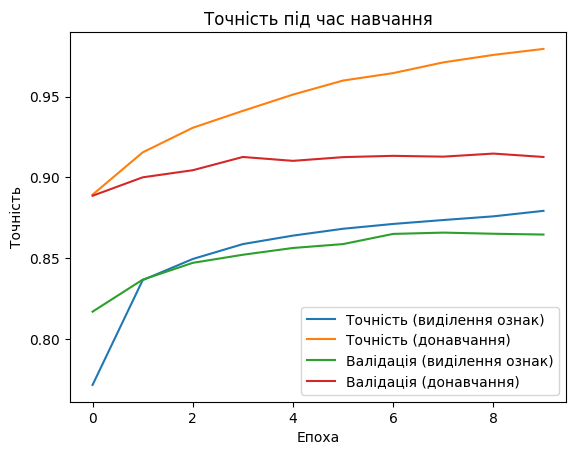

In [10]:
plt.plot(history.history['accuracy'], label='Точність (виділення ознак)')
plt.plot(history_fine_tune.history['accuracy'], label='Точність (донавчання)')
plt.plot(history.history['val_accuracy'], label='Валідація (виділення ознак)')
plt.plot(history_fine_tune.history['val_accuracy'], label='Валідація (донавчання)')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.title('Точність під час навчання')
plt.show()